<a href="https://colab.research.google.com/github/alexwilliam1/Processamento_de_audio/blob/master/ballroom_metadata_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#### Importações

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import glob
import wave
from tqdm import tqdm
import matplotlib.pyplot as plt
# import os
# from scipy.io import wavfile as wav
# import struct

#### Carregar base

In [ ]:
dataset_path = '/content/drive/My Drive/BallroomExtended'

ballroom_metadata = []

#### Ler audios e extrair caracteristicas

In [ ]:
def metadata_generator(dataset_path):
    path_folders = glob.glob(dataset_path + '/' + '*')
    
    print(path_folders)
    
    for fold_ in path_folders:
        path_classes = glob.glob(fold_ + '/' + '*')
        
        print(path_classes)
        
        #capturando o nome do set e a qual o audio pertence: treino ou teste
        Base = fold_.split('/')[-1]
    
        class_id = 0
        audio_class = []
        
        for class_ in tqdm(path_classes): 
            
            class_id += 1
            
            #capturando o nome das classes
            class_name = class_.split('/')[-1]

            path_audios = glob.glob(class_ + '/' + '*')

            for audio_ in path_audios: 
                             
                #capturando o nome das classes
                audio_name = audio_.split('/')[-1]

                opened_audio = wave.open(audio_, "rb").getparams()
                

                #Wave_read.getparams()
                #Returns a namedtuple() 
                #(nchannels, sampwidth, framerate, nframes, comptype, compname), equivalent to output of the get*() methods.
                #opened_audio[0] = Número de canais
                #opened_audio[1] = Largura da amostra em bytes
                #opened_audio[2] = Taxa de frequência
                #opened_audio[3] = Número de frames


                rate = opened_audio[2]
                duration = opened_audio[3]/opened_audio[2]
                n_channels = opened_audio[0]
                
                bit_depth = opened_audio[1]**4 #conversão de bytes para bits 
                
                # audio = open(audio_path,"rb")
                # buffer_header = audio.read(44) #vamos ler todo o cabeçalho do arquivo 
                # bit_depth = struct.unpack('<H', buffer_header[34:36])[0]  
                

                audio_class = [audio_name, class_id, class_name, Base, duration, rate, n_channels, bit_depth]

                ballroom_metadata.append(audio_class)
    
    return ballroom_metadata

In [ ]:
metadata = metadata_generator(dataset_path)

0it [00:00, ?it/s]
  0%|          | 0/13 [00:00<?, ?it/s]

['/content/drive/My Drive/BallroomExtended/ballroomExtended_metadata.csv', '/content/drive/My Drive/BallroomExtended/Tests', '/content/drive/My Drive/BallroomExtended/Train']
[]
['/content/drive/My Drive/BallroomExtended/Tests/Slowwaltz', '/content/drive/My Drive/BallroomExtended/Tests/Samba', '/content/drive/My Drive/BallroomExtended/Tests/Wcswing', '/content/drive/My Drive/BallroomExtended/Tests/Waltz', '/content/drive/My Drive/BallroomExtended/Tests/Tango', '/content/drive/My Drive/BallroomExtended/Tests/Viennesewaltz', '/content/drive/My Drive/BallroomExtended/Tests/Salsa', '/content/drive/My Drive/BallroomExtended/Tests/Rumba', '/content/drive/My Drive/BallroomExtended/Tests/Quickstep', '/content/drive/My Drive/BallroomExtended/Tests/Pasodoble', '/content/drive/My Drive/BallroomExtended/Tests/Jive', '/content/drive/My Drive/BallroomExtended/Tests/Chacha', '/content/drive/My Drive/BallroomExtended/Tests/Foxtrot']


  0%|          | 0/13 [00:00<?, ?it/s]

['/content/drive/My Drive/BallroomExtended/Train/Waltz', '/content/drive/My Drive/BallroomExtended/Train/Rumba', '/content/drive/My Drive/BallroomExtended/Train/Viennesewaltz', '/content/drive/My Drive/BallroomExtended/Train/Wcswing', '/content/drive/My Drive/BallroomExtended/Train/Tango', '/content/drive/My Drive/BallroomExtended/Train/Slowwaltz', '/content/drive/My Drive/BallroomExtended/Train/Quickstep', '/content/drive/My Drive/BallroomExtended/Train/Samba', '/content/drive/My Drive/BallroomExtended/Train/Salsa', '/content/drive/My Drive/BallroomExtended/Train/Pasodoble', '/content/drive/My Drive/BallroomExtended/Train/Jive', '/content/drive/My Drive/BallroomExtended/Train/Chacha', '/content/drive/My Drive/BallroomExtended/Train/Foxtrot']


100%|██████████| 13/13 [58:13<00:00, 268.72s/it]


#### Gerar arquivo .csv

In [ ]:
# Salvando os metadados em um .csv
os.chdir(dataset_path)
header = "AudioName,ClassID,Class,Base,Duration,FrameRate,Channels,Bits/A"
np.savetxt("NEW_ballroomExtended_metadata.csv", metadata, delimiter=",", fmt="%s", header=header)

# Análise dos Metadados

#### Carregando metadados .csv

In [ ]:
metadata = pd.read_csv('/content/drive/My Drive/BallroomExtended/NEW_ballroomExtended_metadata.csv')

#### Cabeçalho

In [ ]:
metadata

,# AudioName,ClassID,Class,Base,Duration,FrameRate,Channels,Bits/A
0,116401.wav,1,Slowwaltz,Tests,30.000000,48000,2,16
1,116402.wav,1,Slowwaltz,Tests,30.000000,48000,2,16
2,116403.wav,1,Slowwaltz,Tests,30.000000,48000,2,16
3,116405.wav,1,Slowwaltz,Tests,30.000000,48000,2,16
4,116404.wav,1,Slowwaltz,Tests,30.000000,48000,2,16
...,...,...,...,...,...,...,...,...
4175,118706.wav,13,Foxtrot,Train,29.988571,44100,2,16
4176,118708.wav,13,Foxtrot,Train,29.988571,44100,2,16
4177,118707.wav,13,Foxtrot,Train,29.988571,44100,2,16
4178,118709.wav,13,Foxtrot,Train,29.988571,44100,2,16


### Informações de Classe

#### Nomes das classes

In [ ]:
pd.unique(metadata['Class'])

array(['Slowwaltz', 'Samba', 'Wcswing', 'Waltz', 'Tango', 'Viennesewaltz',
       'Salsa', 'Rumba', 'Quickstep', 'Pasodoble', 'Jive', 'Chacha',
       'Foxtrot'], dtype=object)

#### Número de classes

In [ ]:
n_classes = len(pd.unique(metadata['Class']))

print('Numero de classes: ', n_classes)

Numero de classes:  13


#### Número de amostras por classe

In [ ]:
metadata['Class'].value_counts().to_frame()

,Class
Waltz,529
Foxtrot,507
Quickstep,497
Rumba,470
Samba,468
Tango,464
Chacha,455
Jive,350
Viennesewaltz,252
Slowwaltz,65


#### Amostras por base

In [ ]:
metadata['Base'].value_counts().to_frame()

,Base
Train,3345
Tests,835


#### Duração dos áudios

In [ ]:
metadata['Duration'].describe().to_frame()

,Duration
count,4180.000000
mean,30.914466
std,12.057541
min,29.988571
25%,30.000000
50%,30.040816
75%,30.040816
max,256.968000


### Plotagem dos dados

#### Duração dos audios

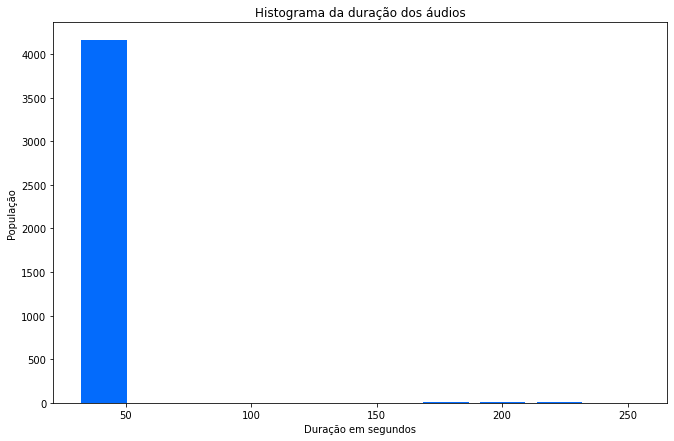

In [ ]:
plt.hist(metadata['Duration'], rwidth=0.8, color="#036bfc")
plt.rcParams['figure.figsize'] = (11,7)
plt.xlabel('Duração em segundos')
plt.ylabel('População')
plt.title('Histograma da duração dos áudios')
plt.grid(False)
plt.show()

#### Amostras por classe

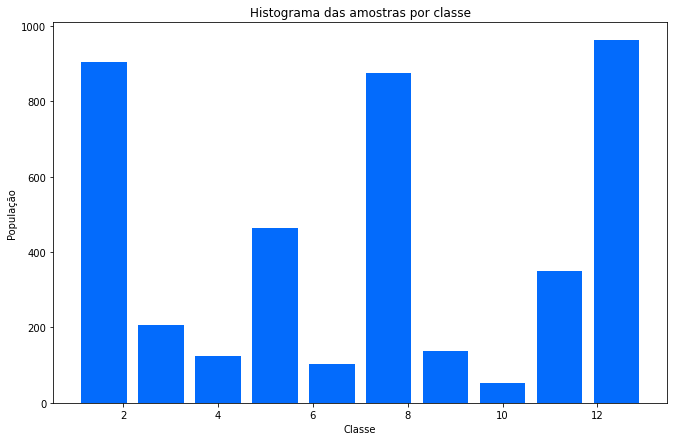

In [ ]:
plt.hist(metadata['ClassID'], rwidth=0.8, color='#036bfc')
plt.rcParams['figure.figsize'] = (11,7)
plt.xlabel('Classe')
plt.ylabel('População')
plt.title('Histograma das amostras por classe')
plt.grid(False)
plt.show()

#### FrameRate das amostras

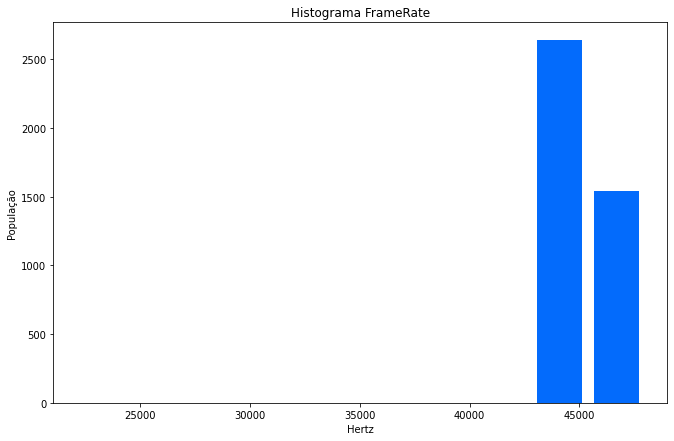

In [ ]:
plt.hist(metadata['FrameRate'], rwidth=0.8, color='#036bfc')
plt.rcParams['figure.figsize'] = (11,7)
plt.xlabel('Hertz')
plt.ylabel('População')
plt.title('Histograma FrameRate')
plt.grid(False)
plt.show()

#### Número de canais

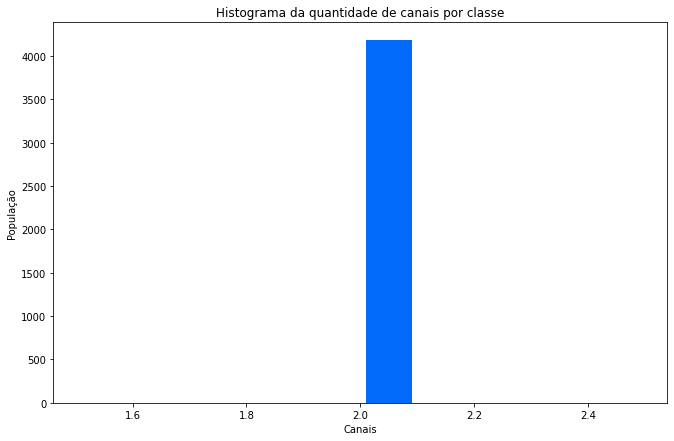

In [ ]:
plt.hist(metadata['Channels'], rwidth=0.8, color='#036bfc')
plt.rcParams['figure.figsize'] = (11,7)
plt.xlabel('Canais')
plt.ylabel('População')
plt.title('Histograma da quantidade de canais por classe')
plt.grid(False)
plt.show()

#### Bits por amostra

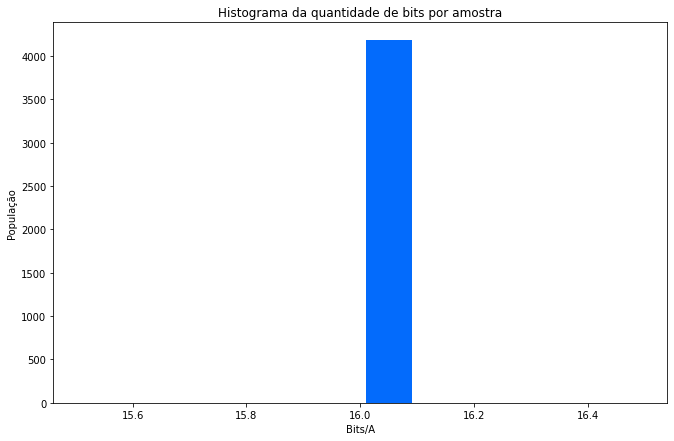

In [ ]:
plt.hist(metadata['Bits/A'], rwidth=0.8, color='#036bfc')
plt.rcParams['figure.figsize'] = (11,7)
plt.xlabel('Bits/A')
plt.ylabel('População')
plt.title('Histograma da quantidade de bits por amostra')
plt.grid(False)
plt.show()